# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [195]:
# Libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
import pandas as pd
import seaborn as sb

## Challenge 1

#### The data we will use in this challenge is:

In [3]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

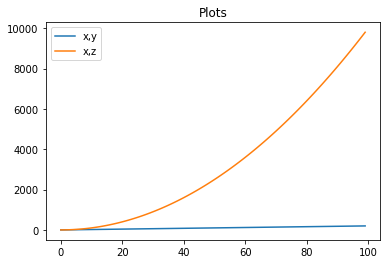

In [4]:
# Method 1
plt.plot(x,y, label = ('x,y')) #plots x against y
plt.plot(x,z, label = ('x,z')) #plot x against z
plt.title("Plots") #gives the plot a title
plt.legend() # give the plot a legend, based on the labels that were assigned in the plots
plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

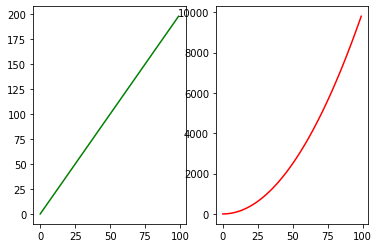

In [5]:
# Method 2
fig, ax = plt.subplots(nrows=1, ncols=2) #assigns figures and axes for subplots. we give it 1 row and 2 columns
ax[0].plot(x, y, 'g-', label='(x,y)') #at position 0 on the subplot we have x against y, with a green line
ax[1].plot(x, z, 'r-', label='(x,z)') # at position 1 on the subplot we have x against z, with a red line
plt.show()

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

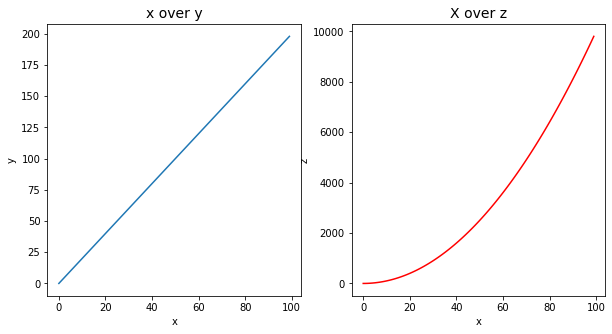

In [6]:
# your code here
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(10, 5)) #first we assign width to figsize, then height. 
ax[0].plot(x, y, label='(x,y)')
ax[1].plot(x, z, 'r-', label='(x,z)')
ax[0].set_title('x over y',fontweight='light', size=14)
ax[1].set_title('X over z',fontweight='light', size=14)
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')
ax[1].set_xlabel('x')
ax[1].set_ylabel('z')
plt.show()

#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

In [7]:
#x = np.linspace(0,10,500)
#first_y = x**2
#second_y = np.exp(x)
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20, 10))

##TO DO##


#### As a bonus challenge, try to add a legend to the plot.

In [8]:
# your code here

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [9]:
fitbit = pd.read_csv('Fitbit2.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

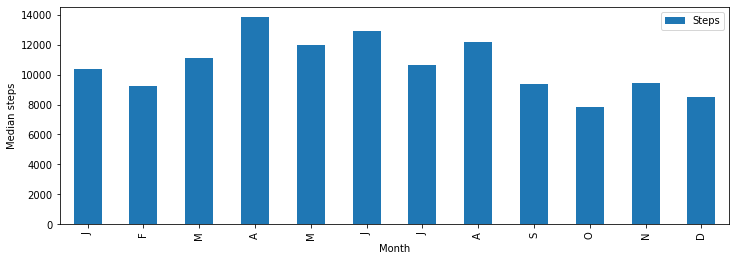

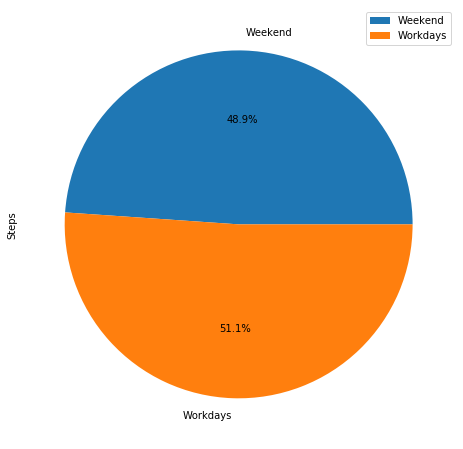

In [101]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here
steps_months = fitbit.groupby(['Months_encoded'], as_index=False).agg({"Steps": "median"}) # this gets the median steps per month
steps_months.plot.bar(x='Months_encoded',y='Steps', figsize=(12, 4)) # this plots a bar graph of fig size 12,
months = ['J','F','M','A','M','J','J','A','S','O','N','D'] # this is our list of labels to apply to the graph

plt.xticks(range(12), months) # this applies our months list to the x axis 
plt.ylabel('Median steps') # this applies a label to y axis
plt.xlabel('Month') # this applies a label to x axis
plt.show()

# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here
steps_wow = fitbit.groupby(['Work_or_Weekend'], as_index=False).agg({"Steps": "median"})
steps_wow.plot.pie(x='Months_encoded',y='Steps', labels=labels,autopct='%1.1f%%', figsize=(24, 8))
plt.show()

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

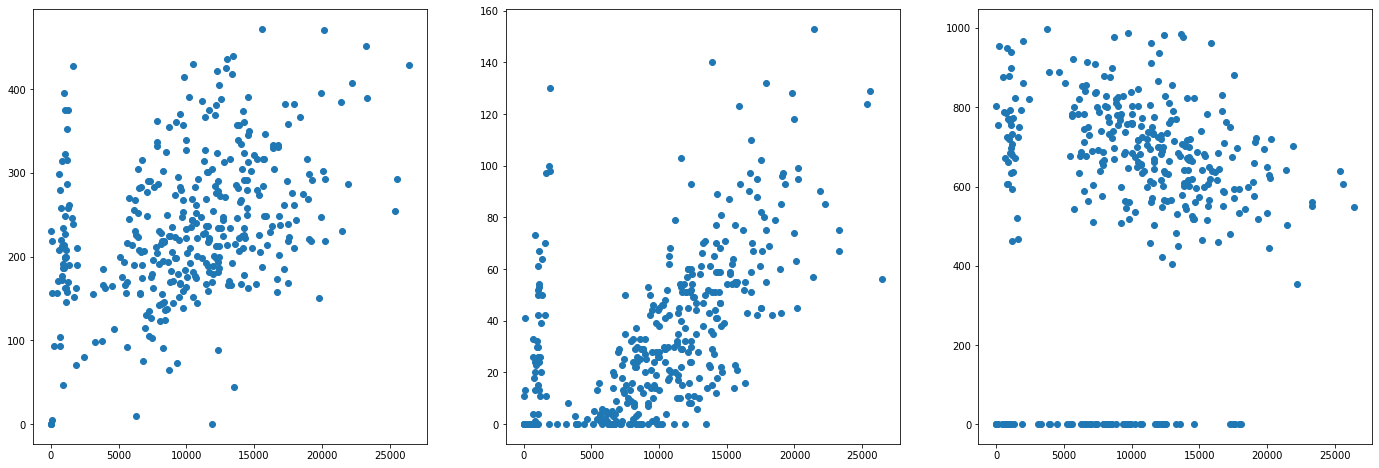

In [148]:
# your code here
fig,axs = plt.subplots(1,3,figsize = (24,8))
activity_levels = ['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']
for x,y in zip(range(len(activity_levels)),activity_levels):
    axs[x].scatter(fitbit['Steps'],fitbit[y])

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [151]:
titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Explore the titanic dataset using Pandas dtypes.

In [156]:
# your code here
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [158]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(number).head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [159]:
# CATEGORICAL VARIABLES
# your code here
titanic.select_dtypes(object).head()

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

[]

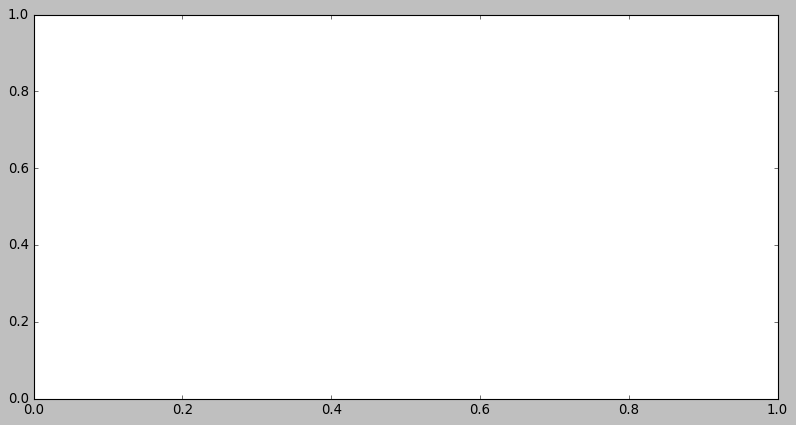

In [168]:
# your code here
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
plt.figure(num=1, figsize=(12,6))

#### Use the right visulalization to show the distribution of column `Age`.

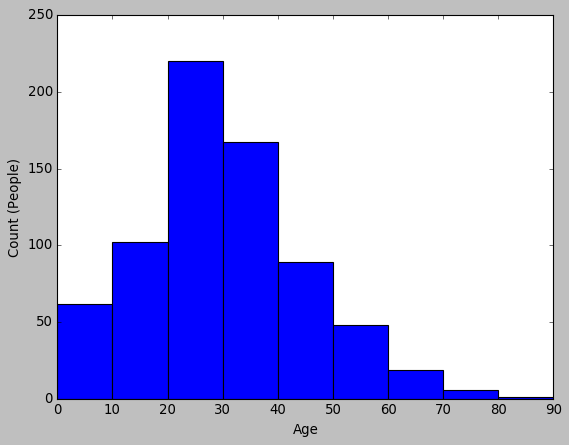

In [194]:
matplotlib.pyplot.hist(titanic['Age'], bins=range(0,100,10)) # this creates bins of 10, counts the column Age in the dataset
plt.ylabel('Count (People)') # this applies a label to y axis
plt.xlabel('Age') # this applied a lavel to x axis
plt.show()

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

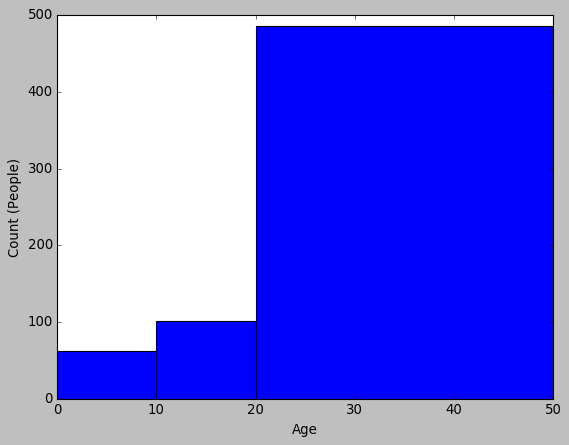

In [193]:
matplotlib.pyplot.hist(titanic['Age'], bins=(0,10,20,50)) # this creates bins between,0-10,10-20,20-50
plt.ylabel('Count (People)') # this applies a label to y axis
plt.xlabel('Age') # this applied a lavel to x axis
plt.show()

#### How does the bin size affect your plot?

In [19]:
"""
With bigger bin sizes, there is less detail, but we can make quicker assumptions. 
For example, on the second plot, we can immediately conclude the the vast majority of passengers were 20+
Change bin size also affects skew. On the first plot, we have slightly right-skewed distribution, 
whilst we have a left-skewed distribution on the second plot. 
""" 

'\nyour comments here\n'

#### Use seaborn to show the distribution of column `Age`.

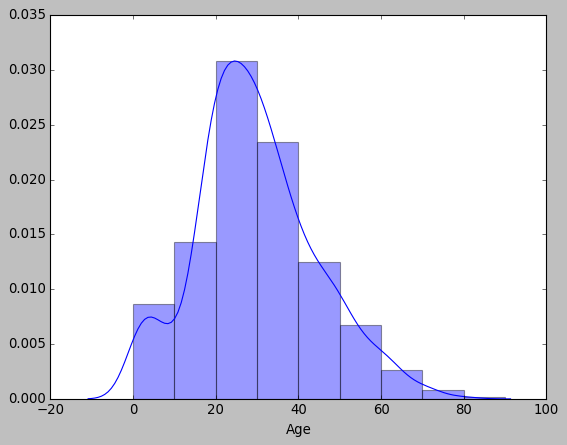

In [200]:
sb.distplot(titanic['Age'], bins=range(0,100,10))
plt.show()

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

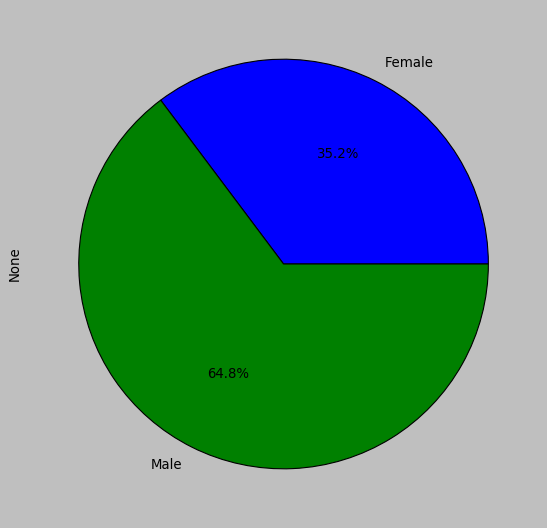

Sex
female    314
male      577
dtype: int64


In [220]:
# Method 1 - matplotlib
gender_count = titanic.groupby(['Sex']).size()
gender_count.plot.pie(x='Sex', labels=('Female','Male'),autopct='%1.1f%%', figsize=(24, 8))
plt.show()

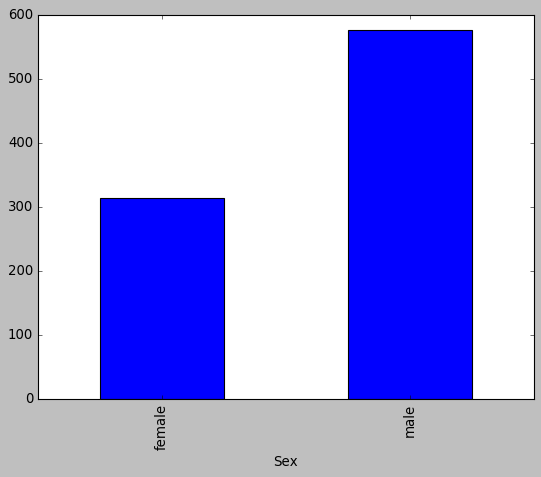

In [224]:
# Method 2 - seaborn
gender_count.plot.bar()
plt.show()

#### Use the right plot to visualize the column `Pclass`.

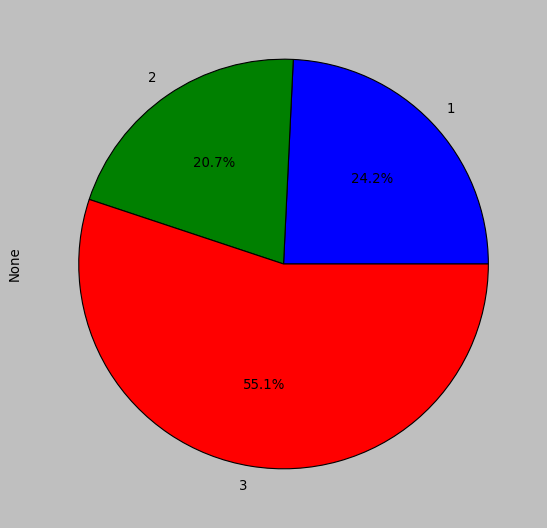

In [229]:
# your code here
titanic.head()
Pclass_count = titanic.groupby(['Pclass']).size()
Pclass_count.plot.pie(x='Pclass', labels=('1','2','3'),autopct='%1.1f%%', figsize=(24, 8))
plt.show()

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

In [238]:
titanic['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [25]:
"""
I originally used a box plot for this question, but then it was required for the question below. 
I'm not sure what is being asked for here. 
"""

'\nyour comments here\n'

#### What does the last plot tell you about the feature `Age`?

In [26]:
"""
Mean age is 29.
Max age is 80.
Min age was less than 1 year.
Majority of people were between the age of 20 and 38.
"""

'\nyour comments here\n'

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

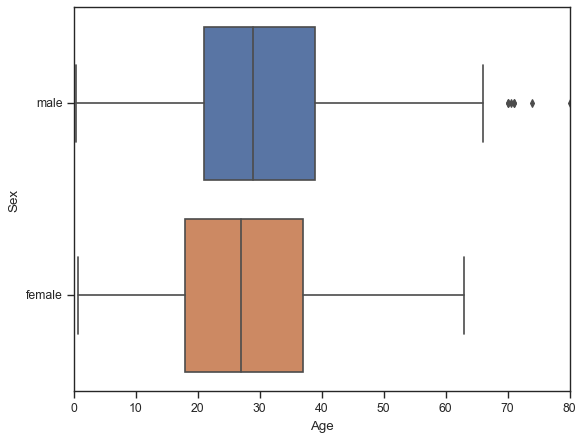

In [239]:
sb.boxplot(x=titanic['Age'], y=titanic['Sex'])

#### What additional information does the last plot provide about feature `Age`?

In [28]:
"""
It makes sense to use a boxplot for this task, because it would show the distribution of quantitative data. 
We could then look at how those descriptive stats change for other factors. 

In the above example, we can see that the descriptive stats for females are lower than they are for males.
There are several outliers for the male category, but none for the female.
"""

'\nyour comments here\n'

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

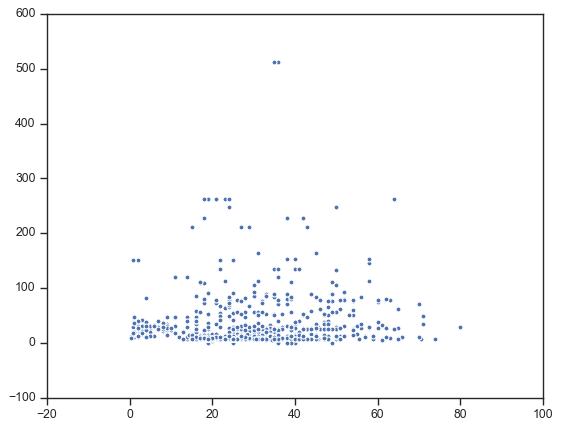

In [253]:
# Method 1 - matplotlib
plt.scatter(x = "Age", y = "Fare", data = titanic)
plt.show()

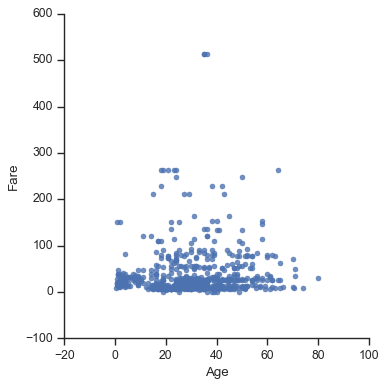

In [254]:
# Method 2 - seaborn
sb.lmplot(x = 'Age', y = 'Fare', data=titanic, fit_reg=False)
plt.show()

#### Plot the correlation matrix using seaborn.

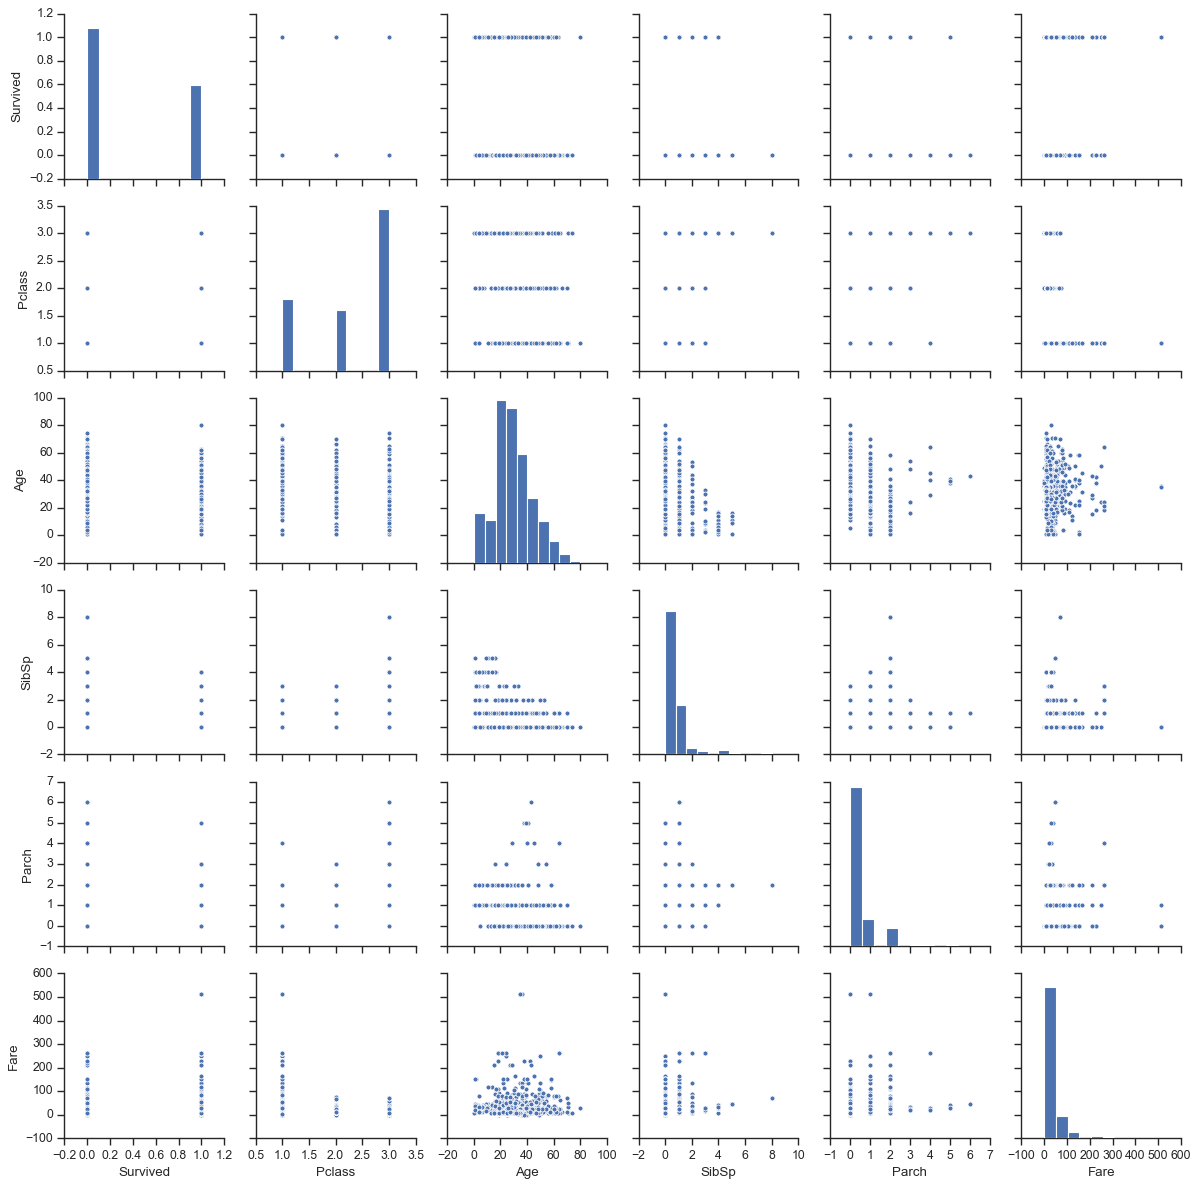

In [263]:
sb.set(style="ticks")
sb.pairplot(titanic[["Survived","Pclass","Age","SibSp","Parch","Fare"]])
plt.show()

#### What are the most correlated features?

In [32]:
"""
SibSp and Age.
"""

'\nyour comments here\n'

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

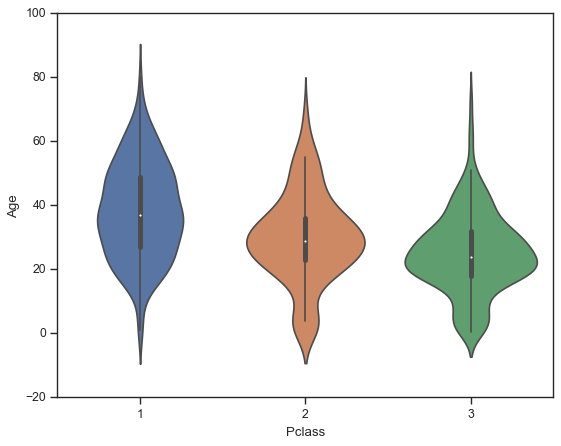

In [276]:
sb.violinplot("Pclass","Age", data = titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

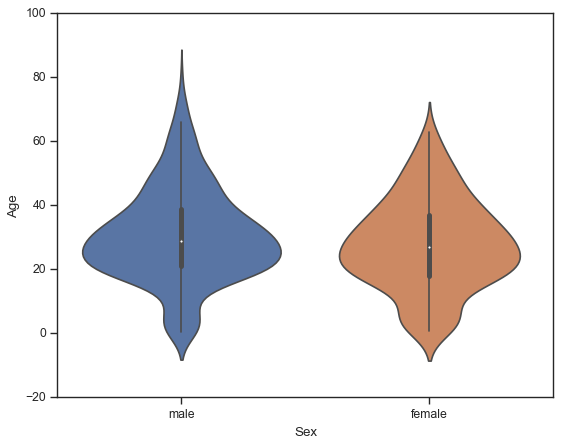

In [278]:
sb.violinplot("Sex","Age", data = titanic)